# **SNT - Les données structurées et leur traitement**

![TitanA](http://lycee.lagrave.free.fr/SNTdata/TP/actitanic.png)


# Partie A


*   **le tri**
  * ordonner les objets selon l'un de leur descripteur ;
  * sur plusieurs critères ;
  * tri sur des valeurs textuelles.
*  **le filtre**
  * ne retenir que les objets pour lesquels un critère est vérifié ;
  * combiner les critères : et/ou. 
*  **le calcul individuel**
*  **le calcul agrégatif**
  * faire un calcul sur plusieurs des objets (tous ou une sélection).
  
Pour les questions $2$ à $8$ quelques réponses en images (*à "afficher" pour agrandir*) en appliquant des filtres/tris adaptés :

**2. Combien de personnes étaient âgées de $10$ ans ?**
![excel1](http://lycee.lagrave.free.fr/SNTdata/TP/excel1.png)

**3. Quel est le prix du billet le plus élevé ?**
![excel2](http://lycee.lagrave.free.fr/SNTdata/TP/excel2.png)

**4. Combien de femmes en $1$-ère classe voyageaient sur le Titanic ?**

![excel30](http://lycee.lagrave.free.fr/SNTdata/TP/excel30.png)

**Quel âge pour la plus jeune ?**

![excel3](http://lycee.lagrave.free.fr/SNTdata/TP/excel4.png)

**Pour la plus âgée ?**
![excel4](http://lycee.lagrave.free.fr/SNTdata/TP/excel3.png)

**5. En considérant que l'on est enfant lorsqu'on a moins de $18$ ans, déterminer le nombre de
femmes et d'enfants qui ont survécu.**

**Que penser alors de l'adage "les femmes et les enfants d'abord" ?**
![excel5](http://lycee.lagrave.free.fr/SNTdata/TP/excel5.png)

**6. Quel est le tarif moyen du billet des personnes qui voyageaient en $1$-ère classe ?**
![excel6](http://lycee.lagrave.free.fr/SNTdata/TP/excel6.png)

**7. Quelle est la moyenne d'âge des personnes qui voyageaient en $3$-ème classe ?**
![excel7](http://lycee.lagrave.free.fr/SNTdata/TP/excel7.png)

**8. Indiquer selon le genre des personnes de chaque classe, la fréquence du descripteur
"Survivant".**
![excel8](http://lycee.lagrave.free.fr/SNTdata/TP/excel8.png)

Voir le fichier en ligne : [excel](https://acnicefr-my.sharepoint.com/:x:/g/personal/franck_lagrave_ac-nice_fr/EQou8zOTLWhBnVbAehDJqFABF_KCEfrH2bbR8yp1DWqElg?rtime=9wWHBEDa1kg)

# Partie B

In [ ]:
!pip install matplotlib
!pip install seaborn
%matplotlib inline
!pip install pandas

![TitanB](http://lycee.lagrave.free.fr/SNTdata/TP/actitanic2.png)

In [2]:
import pandas
data=pandas.read_csv('titanic.csv',sep=';')

**1. Instruction $\texttt{data.head()}$**

In [3]:
data.head()

,classe,survie,nom,sexe,age,tarif
0,1,1,"Allen, Miss. Elisabeth Walton",2,29.0,211.0
1,1,1,"Allison, Master. Hudson Trevor",1,1.0,152.0
2,1,0,"Allison, Miss. Helen Loraine",2,2.0,152.0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.0,152.0
4,1,0,"Allison, Mrs. Hudson Bessie Waldo Daniels",2,25.0,152.0


**1. Instruction $\texttt{data.shape}$**


In [4]:
data.shape

(1309, 6)

**1. Instruction $\texttt{data.dtypes}$**

In [5]:
data.dtypes

classe      int64
survie      int64
nom        object
sexe        int64
age       float64
tarif     float64
dtype: object

**2. Exécuter la commande $\texttt{data.describe()}$ Quel est le prix moyen du billet ?**

In [6]:
data.describe()

,classe,survie,sexe,age,tarif
count,1309.000000,1309.000000,1309.000000,1046.000000,1308.000000
mean,2.294882,0.381971,1.355997,29.897706,33.363150
std,0.837836,0.486055,0.478997,14.414973,51.751529
min,1.000000,0.000000,1.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,21.000000,8.000000
50%,3.000000,0.000000,1.000000,28.000000,14.000000
75%,3.000000,1.000000,2.000000,39.000000,31.000000
max,3.000000,1.000000,2.000000,80.000000,512.000000


**3 -2. Combien de personnes étaient âgées de $10$ ans ?**

In [7]:
data['age'].describe() # remarque : pour statistiques descriptives 

count    1046.000000
mean       29.897706
std        14.414973
min         0.000000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [8]:
data.query('age == 10')
#data.loc[data['age']==10,:]
##liste individus avec #lignes => filtre age=10 #colonnes = : (toutes les colonnes)

,classe,survie,nom,sexe,age,tarif
828,3,0,"Goodwin, Miss. Jessie Allis",2,10.0,47.0
1141,3,0,"Rice, Master. Albert",1,10.0,29.0
1207,3,0,"Skoog, Master. Karl Thorsten",1,10.0,28.0
1265,3,0,"Van Impe, Miss. Catharina",2,10.0,24.0


In [9]:
data.query('age == 10').shape[0]
#(data['age']==10).value_counts() #denombrement par booleen

4

**3 -3. Quel est le prix du billet le plus élevé ?**

In [10]:
#data['tarif'].describe() # remarque : pour statistiques descriptives 
data['tarif'].max()

512.0

In [11]:
#Par defaut axis = 0 ==> chaque colonne sera transmise à la fonction
#on peut aussi calculer sur les lignes plutôt que les colonnes :
#data.apply(lambda x: x.max(), axis = 1)
#la selection select_dtypes() permet d'exclure les variables non numériques
#data.select_dtypes(exclude=['object']).apply(lambda x: x.max(), axis = 1)
data.apply(lambda x: x.max()) 
# (apply prend une fonction qui prend en argument une série) ; ici calcul aggrégat

classe                              3
survie                              1
nom       van Melkebeke, Mr. Philemon
sexe                                2
age                                80
tarif                             512
dtype: object

**4. Combien de femmes en $1$-ère classe voyageaient sur le Titanic ?
Quel âge pour la plus jeune ? Pour la plus âgée ?**

In [12]:
data.query('sexe==2 and classe==1').shape[0]

144

In [13]:
data.query('sexe==2 and classe==1')['age'].min()

2.0

In [14]:
data.query('sexe==2 and classe==1')['age'].max()

76.0

In [15]:
groupe1=data.groupby('sexe') #scission des donnees selon le sexe

#calculer la dimension du sous-DataFrame associé aux femmmes
#print(groupe1.get_group(2).shape)

groupe2=data.groupby(['sexe','classe']) #scission des donnees selon le sexe et la classe
#groupe2.min()
#groupe2.get_group((2,1))
print("Combien de femmes en 1-ère classe voyageaient sur le Titanic ? ",
      groupe2.get_group((2,1)).shape[0])
print("Quel âge pour la plus jeune ? ",groupe2.get_group((2,1))['age'].min())
print("Quel âge pour la plus âgée  ? ",groupe2.get_group((2,1))['age'].max())

Combien de femmes en 1-ère classe voyageaient sur le Titanic ?  144
Quel âge pour la plus jeune ?  2.0
Quel âge pour la plus âgée  ?  76.0


**5. En considérant que l'on est enfant lorsqu'on a moins de $18$ ans, déterminer le nombre de
femmes et d'enfants qui ont survécu.**

**Que penser alors de l'adage "les femmes et les enfants d'abord" ?**

In [16]:
#data.shape[0]
#data.query('survie==1').shape[0]
data.query('survie==1 and (sexe==2 or age < 18)').shape[0] #!= 396

#data.query('survie==1').isnull().sum()

  

370

In [17]:
pandas.crosstab(data["survie"],data["sexe"],margins=True)
#pandas.crosstab(data["survie"],data["sexe"],margins=True).iat[1,1] #valeur lig 1 et col 1,
#data.query('survie==1 and sexe==1 and age < 18').shape[0]
#data['age'].max()
#age_groups = pandas.cut(data['age'], bins=[0, 17, 80]) # creer 2 groupes age : (0, 17] et (17, 80]
#pandas.crosstab(age_groups, data['survie'],margins=True) # Total != valeurs age manquantes

sexe,1,2,All
survie,,,
0,682,127,809
1,161,339,500
All,843,466,1309


Seaborn est une librairie qui vient s'ajouter à Matplotlib, remplace certains réglages par défaut et fonctions, et lui ajoute de nouvelles fonctionnalités (les fonctions de Matplotlib ne sont pas faites pour interagir avec les Dataframes de Pandas) en utilisant toujours Matplotlib "sous le capot".

In [63]:
import seaborn as sns

/home/fk/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


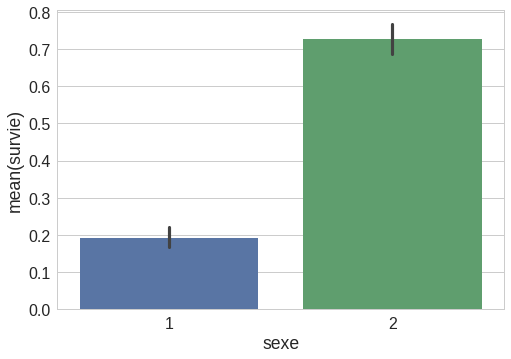

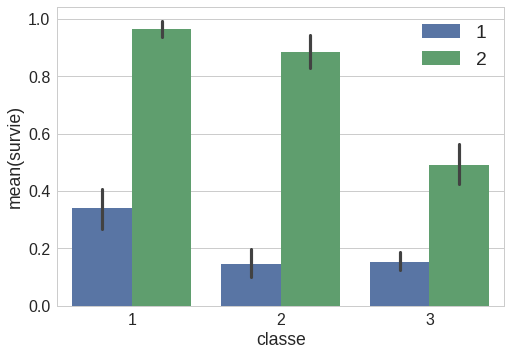

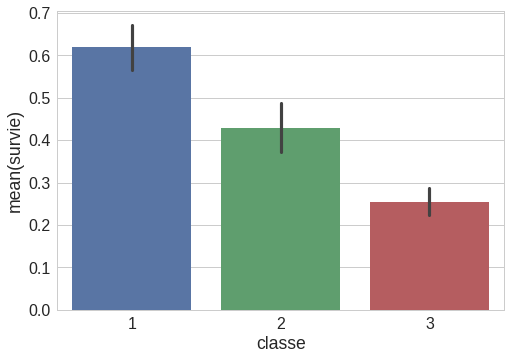

In [118]:
#import warnings
def plot_cat(data, x_axis, y_axis, hue):
    #plt.figure() 
    sns.set(style="whitegrid")
    sns.set_context("notebook", font_scale=1.6)
    sns.barplot(x=x_axis, y=y_axis, hue=hue, data=data)
    plt.legend(loc="upper right", fontsize="medium")
    plt.show()

#with warnings.catch_warnings(record=True):

plot_cat(data,"sexe", "survie", None)
plot_cat(data,"classe", "survie", "sexe") 
plot_cat(data,"classe", "survie", None)


**6. Quel est le tarif moyen du billet des personnes qui voyageaient en $1$-ère classe ?**

In [19]:
data.query('classe==1')['tarif'].mean()

87.59442724458205

**7. Quelle est la moyenne d'âge des personnes qui voyageaient en $3$-ème classe ?**

In [20]:
data.query('classe==3')['age'].mean()

24.842315369261478

**8. Indiquer selon le genre des personnes de chaque classe, la fréquence du descripteur
"Survivant".**

In [21]:
#groupe3=data.groupby(['classe','sexe']) #scission des donnees selon la classe et le sexe
#groupe30=data.groupby(['classe','sexe','survie'])
#print(groupe30.get_group((1,1,1)).shape[0])
#print(groupe30.get_group((1,1,0)).shape[0])
##eff1=groupe30['survie'].count()
##print(eff1)
#total=groupe3['survie'].count()
#print(total)

eff=data.query('survie==1').groupby(['classe','sexe'])['survie'].count()
total=                 data.groupby(['classe','sexe'])['survie'].count()

print(eff/total)  

classe  sexe
1       1       0.340782
        2       0.965278
2       1       0.146199
        2       0.886792
3       1       0.152130
        2       0.490741
Name: survie, dtype: float64


**La solution -Tableaux croisés dynamiques- version "Datascientist"** sur [OpenClassrooms](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/5574866-manipulez-les-donnees-contenues-dans-vos-dataframes).

In [22]:
data.pivot_table('survie', index='sexe', columns='classe')

classe,1,2,3
sexe,,,
1,0.340782,0.146199,0.152130
2,0.965278,0.886792,0.490741


---

**Remarque :** La gestion des données manquantes est souvent un point délicat. De nombreuses stratégies ont été élaborées, nous décrivons ici une possibilité à mettre en œuvre avec $\texttt{pandas}$.

Il est ainsi facile de supprimer toutes les observations présentant des données manquantes lorsque celles-ci sont peu nombreuses et majoritairement regroupées sur certaines lignes ou colonnes.
- les individus ou lignes $\quad \texttt{data.dropna(axis=0)}$
- les variables ou colonnes $\,\texttt{data.dropna(axis=1)}$

In [ ]:
#'any' supprime lignes/colonnes de chaque valeur Null et 'all' seulement si toutes les valeurs Null
groupe4=data.dropna(axis=0, how='any') 
groupe4.shape

In [ ]:
#Pour eviter de multiples affichages de longs tableaux
#vous pouvez modifier cette option à votre guise
#pandas.options.display.max_rows = 10
groupe4

---

# Le «croisement» de deux tables 
  * sur la base du descripteur commun.
  
**Répondre à des requêtes et identifier les opérations utilisées à l'aide d'un tableur.**

*Activité* sur la fréquentation des Musées de France

In [111]:
from IPython.display import HTML

HTML('<iframe src="https://data.opendatasoft.com/explore/embed/dataset/frequentation-des-musees-de-france@culture/table/?disjunctive.new_name&static=false&datasetcard=false" width="800" height="300" frameborder="0"></iframe>')

* Les [donnees](https://data.opendatasoft.com/explore/dataset/frequentation-des-musees-de-france@culture/download/?format=csv&timezone=Europe/Berlin&use_labels_for_header=true) sources sur la fréquentation des musées au format $\texttt{csv}$ (sep=";") [https://data.opendatasoft.com/](https://data.opendatasoft.com/)
* Les [sources](https://www.insee.fr/fr/statistiques/fichier/3545833/ensemble.xls) de l'[INSEE](https://www.insee.fr/fr/statistiques/3545833?sommaire=3292701) sur la population au format $\texttt{xls}$.

*Pour pouvoir fusionner des données provenant de deux fichiers différents, ceux-ci doivent convenablement être structurés...*

**Pour répondre aux requètes**, le [classeur](http://lycee.lagrave.free.fr/SNTdata/TP/croisement_tables.xlsx) (format $\texttt{xlsx}$) issu des données précédentes est disponible. 

**1. Quel musée a le plus petit nombre d'entrées ?**

![musee1](http://lycee.lagrave.free.fr/SNTdata/TP/musee1.png)

**2. Combien de musées sont dans la ville de Lyon ?**

![musee2](http://lycee.lagrave.free.fr/SNTdata/TP/musee2.png)

**3. Quel est le nombre d'habitants de la ville du musée Alpin ?**

![musee3](http://lycee.lagrave.free.fr/SNTdata/TP/musee3.png)

**4. Quelle est la somme des entrées des musées de Lyon ?**

![musee4](http://lycee.lagrave.free.fr/SNTdata/TP/musee4.png)

# Avec Pandas

#### Importer un fichier Excel

In [24]:
src = pandas.ExcelFile('http://lycee.lagrave.free.fr/SNTdata/TP/croisement_tables.xlsx') 
src.sheet_names

['frequentation', 'habitants']

In [25]:
df1 = pandas.read_excel(src, sheet_name="frequentation")
df1.head(10)

,NOM DU MUSEE,VILLE,ENTREES
0,"Musée d'Arts Africains, Océaniens, Amérindiens",MARSEILLE,0.0
1,Musée de la Faïence,MARSEILLE,0.0
2,Musée de la Mode,MARSEILLE,0.0
3,Musée de l'Hôtel d'Espeyran,MONTPELLIER,0.0
4,Musée Quentovic,ETAPLES-SUR-MER,0.0
5,Atelier Musée Louis Leygue,NAVEIL,51.0
6,Musée Municipal,VAYRAC,106.0
7,Musée Municipal de Civray,CIVRAY,142.0
8,Musée Charles-Louis Philippe,CERILLY,185.0
9,Cabinet des Estampes et des Dessins,STRASBOURG,217.0


In [ ]:
#df2 = pandas.read_excel(src, sheet_name="habitants")
#df2.head()

In [26]:
df_map = pandas.read_excel(src, sheetname=None) 
df1=df_map["frequentation"]
df2=df_map["habitants"]
df2.head()

,VILLE,REGION,HABITANTS
0,ABBEVILLE,HAUTS-DE-France,23278
1,AGDE,OCCITANIE,26946
2,AGEN,NOUVELLE-AQUITAINE,33988
3,AIGUILLES,PROVENCE-ALPES-COTE D'AZUR,425
4,AIGUINES,PROVENCE-ALPES-COTE D'AZUR,271


**2. Combien de musées sont dans la ville de Lyon ?**

In [27]:
df1.loc[df1['VILLE']=='LYON',:]#.count()

,NOM DU MUSEE,VILLE,ENTREES
361,Musée des Sapeurs-Pompiers de Lyon,LYON,9248.0
629,Musée de l'Imprimerie et de la Communication G...,LYON,26478.0
781,Centre d'Histoire de la Résistance et de la Dé...,LYON,59935.0
785,Musée Historique des Tissus - Musée des Arts D...,LYON,60391.0
824,Musées Gadagne,LYON,79449.0
847,Musée de la Civilisation Gallo-Romaine,LYON,94476.0
869,Musée d'Art Contemporain de Lyon,LYON,135000.0
914,Musée des Beaux-Arts,LYON,334459.0
926,Muséum d'histoire naturelle - Musée des Conflu...,LYON,767509.0
1050,Musée des Hospices Civils de Lyon,LYON,NaN


La fonction $\texttt{pandas.merge}$  va automatiquement reconnaître que la colonne VILLE est commune aux deux Dataframes, et va l'utiliser comme condition de [jointure](https://openclassrooms.com/fr/courses/4452741-decouvrez-les-librairies-python-pour-la-data-science/5559346-effectuez-les-operations-dalgebre-relationnelle-sur-les-dataframes).

**3. Quel est le nombre d'habitants de la ville du musée Alpin ?**

In [28]:
df3 = pandas.merge(df1, df2)
df3.loc[df3['NOM DU MUSEE']=='Musée Alpin',:]
##liste individus avec 
#lignes => filtre 'NOM DU MUSEE'='Musée Alpin' #colonnes = : (toutes les colonnes)

,NOM DU MUSEE,VILLE,ENTREES,REGION,HABITANTS
947,Musée Alpin,CHAMONIX,35747.0,AUVERGNE-RHONE-ALPES,8906


**4. Quelle est la somme des entrées des musées de Lyon ?**

In [29]:
df1.loc[df1['VILLE']=='LYON',:].groupby('VILLE').sum()

,ENTREES
VILLE,
LYON,1566945.0
